# Let's Talk About Money

### FIFA 18 Data Exploration With Python

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

## 1. Importing and preparation of data

### 1.1 Load dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('../00_Datasets/FIFA18/PlayerPersonalData.csv', header = 0)

### 1.2 Summarize the Dataset

In [3]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 15 columns):
Unnamed: 0      17981 non-null int64
Unnamed: 0.1    17981 non-null int64
ID              17981 non-null int64
Name            17981 non-null object
Age             17981 non-null int64
Photo           17981 non-null object
Nationality     17981 non-null object
Flag            17981 non-null object
Overall         17981 non-null int64
Potential       17981 non-null int64
Club            17733 non-null object
Club Logo       17981 non-null object
Value           17981 non-null object
Wage            17981 non-null object
Special         17981 non-null int64
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


### 1.3 Data preprocessing

<b>NOTE:</b> Right away we can see that values in columns: 'Value' and 'Wage' aren't numeric but objects. Firstly we need to preprocess the data to make it usable for us. We will use short supporting function to convert values in those two columns into numbers. We will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.

In [5]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

#dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['ValueNum'] = dataset['Value'].apply(lambda x: str2number(x))
dataset['WageNum'] = dataset['Wage'].apply(lambda x: str2number(x))

## 2. Data Visualization

### 2.1. Players with highest value

In [45]:
sorted_players = dataset.sort_values(["ValueNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" , "Value"]].values

In [46]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Value
,Neymar,25,Brazil,€123M
,L. Messi,30,Argentina,€105M
,L. Suárez,30,Uruguay,€97M
,Cristiano Ronaldo,32,Portugal,€95.5M
,R. Lewandowski,28,Poland,€92M
,E. Hazard,26,Belgium,€90.5M
,K. De Bruyne,26,Belgium,€83M
,T. Kroos,27,Germany,€79M
,P. Dybala,23,Argentina,€79M
,G. Higuaín,29,Argentina,€77M


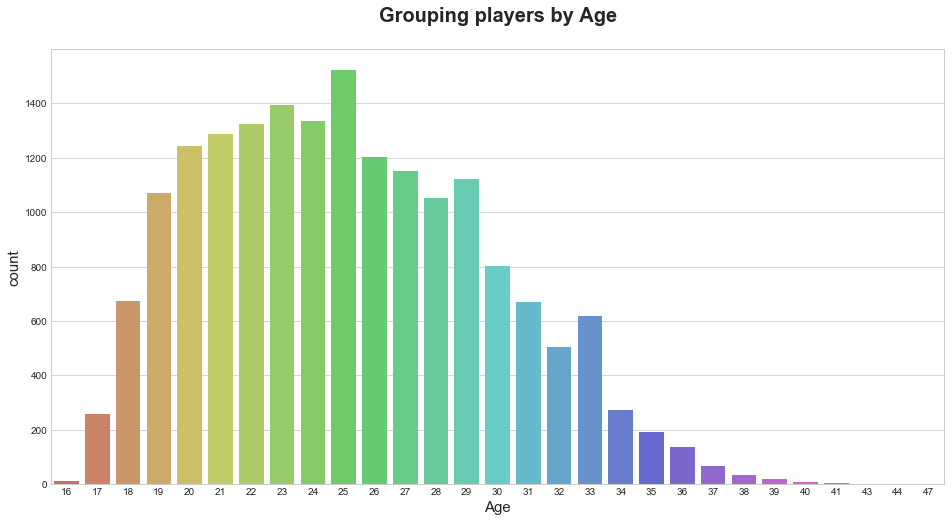

In [7]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Age", data=dataset, palette="hls");
plt.show()

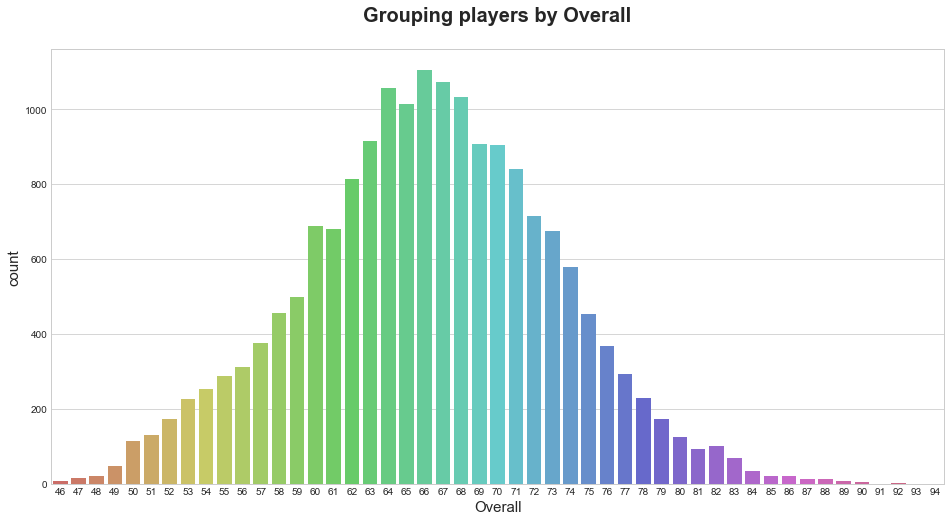

In [8]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()

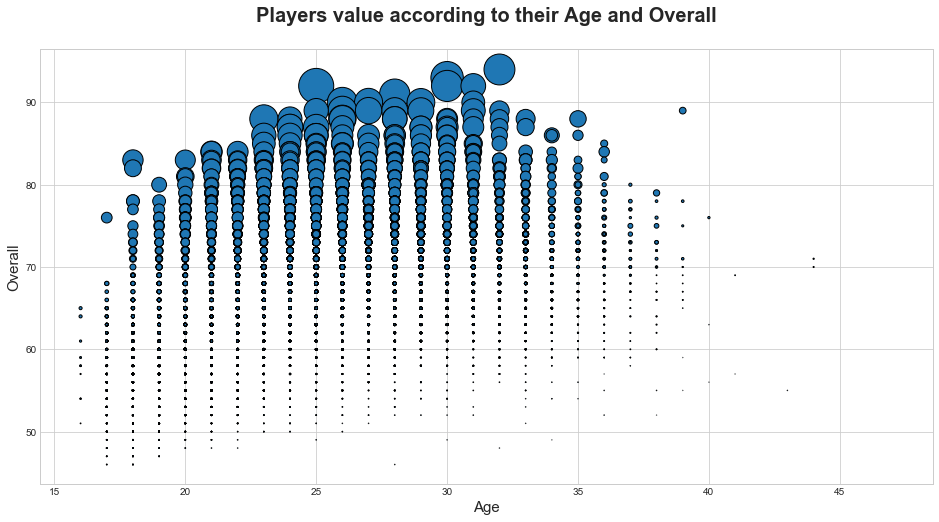

In [19]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players value according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()